In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [42]:
data = pd.read_csv('Adsorption_Data.csv')
X = data.drop('Adorption Capacity(output)', axis=1)
y = data['Adorption Capacity(output)']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [45]:
X_train

array([[ 0.8743226 ,  0.61048135, -0.12587417, -1.02760475, -0.05307541],
       [-1.53647626, -1.03537253, -0.44318199,  0.20356227, -0.61802952],
       [-1.67753364, -1.2147284 , -1.2508746 , -0.39663165, -0.77632891],
       [ 0.91599865,  1.56001243,  0.3068183 , -0.33287478, -0.45003985],
       [ 0.8807343 , -0.33904974, -0.35664349, -1.02760475,  0.45575742],
       [-0.00728602,  0.39947444, -0.270105  , -1.04739136, -0.64784862],
       [ 0.55373765,  2.0875297 ,  1.05681859,  0.8037562 , -0.77516907],
       [-1.47556512, -0.59225802, -0.270105  ,  0.52014808, -0.75739733],
       [ 0.83264656,  1.66551588, -0.47202815, -0.36585247,  0.49691302],
       [ 0.83264656,  1.03249516, -0.8470283 , -0.11961907, -0.77255008],
       [ 0.90958695, -0.33904974, -0.41433582,  0.12221731,  1.1404369 ],
       [ 0.32932818,  0.05131304,  1.11451092, -1.01441367, -0.37483735],
       [-0.30863588,  0.91644136,  0.24912597,  0.02768127,  1.86253055],
       [ 0.67876578,  0.29397099, -1.3

In [48]:
model = Sequential()
model.add(Dense(9, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1))

In [49]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

In [50]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=5)

Epoch 1/100
5/5 [==============================] - 1s 38ms/step - loss: 57.5022 - val_loss: 62.0010
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 57.2848 - val_loss: 61.8711
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 57.0936 - val_loss: 61.7598
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 56.9331 - val_loss: 61.6520
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 56.7766 - val_loss: 61.5498
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 56.5842 - val_loss: 61.4538
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 56.4717 - val_loss: 61.3605
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 56.2817 - val_loss: 61.2794
Epoch 9/100
5/5 [==============================] - 0s 8ms/step - loss: 56.1185 - val_loss: 61.1974
Epoch 10/100
5/5 [==============================] - 0s 8ms/step - loss: 56.0498 - val_loss: 61.0945
Epoch 

In [51]:
test_loss = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 26ms/step - loss: 1.5650


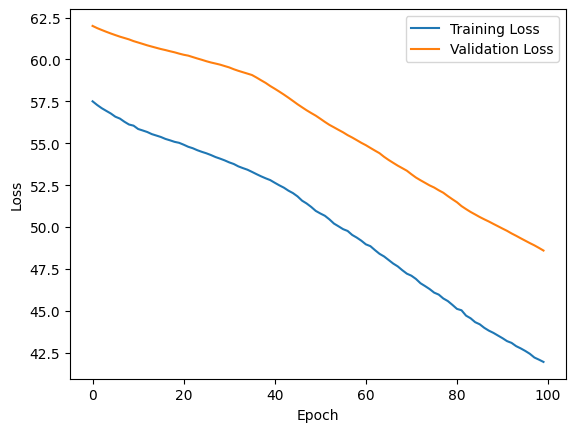

In [52]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
neurons = [9, 16, 32, 64, 128]
learning_rates = [0.001, 0.01, 0.1, 1]
results = []
for n in neurons:
    for lr in learning_rates:
        model = Sequential()
        model.add(Dense(n, activation='relu', input_dim=X_train.shape[1]))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lr))
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=2)
        test_loss = model.evaluate(X_test, y_test)
        results.append({'neurons': n, 'lr': lr, 'test_loss': test_loss})

Epoch 1/100
11/11 [==============================] - 1s 14ms/step - loss: 60.9559 - val_loss: 78.6591
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 60.3773 - val_loss: 78.5198
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 59.7749 - val_loss: 78.3753
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 59.3740 - val_loss: 78.2616
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 58.8192 - val_loss: 78.1518
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 58.2860 - val_loss: 78.0624
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 57.8329 - val_loss: 77.9977
Epoch 8/100
11/11 [==============================] - 0s 6ms/step - loss: 57.3093 - val_loss: 77.9603
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 57.0304 - val_loss: 77.9396
Epoch 10/100
11/11 [==============================] - 0s 6ms/step - loss: 56.3678 - val_lo

In [ ]:
results_df = pd.DataFrame(results)
results_df

,neurons,lr,test_loss
0,9,0.001,5.313603
1,9,0.010,15.313878
2,9,0.100,6.677540
3,9,1.000,12.457506
4,16,0.001,9.362979
5,16,0.010,8.667630
6,16,0.100,4.417880
7,16,1.000,355.897614
8,32,0.001,12.007314
9,32,0.010,2.349440


In [ ]:


y_pred = model.predict(X_test)


1/1 [==============================] - 0s 55ms/step


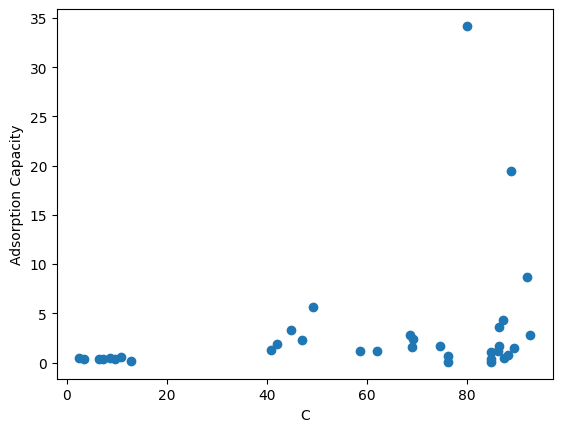

In [ ]:
C = data['C(x1)']
plt.scatter(C, y)
plt.xlabel('C')
plt.ylabel('Adsorption Capacity')
plt.show()

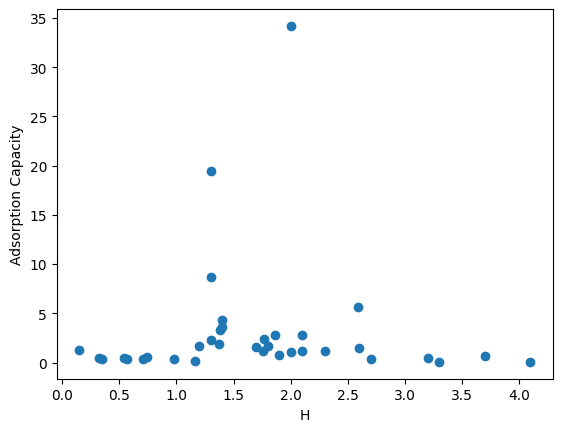

In [ ]:
H = data['H(x2)']
plt.scatter(H, y)
plt.xlabel('H')
plt.ylabel('Adsorption Capacity')
plt.show()

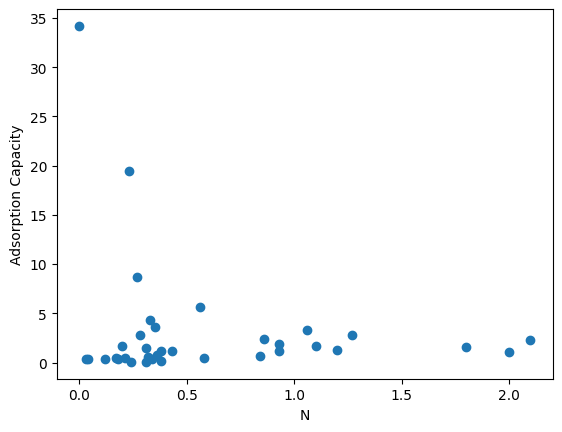

In [ ]:
N = data['N(x3)']
plt.scatter(N, y)
plt.xlabel('N')
plt.ylabel('Adsorption Capacity')
plt.show()

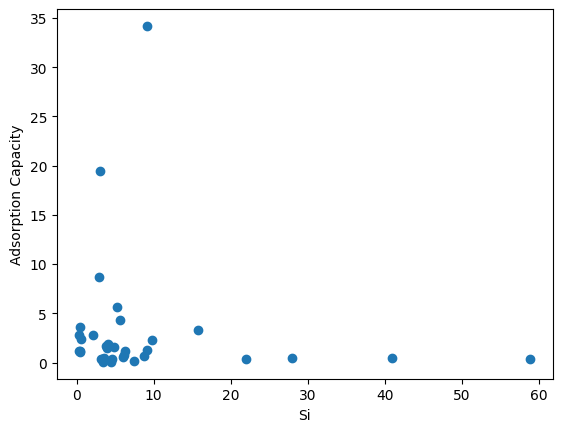

In [ ]:
Si = data['Si(x4)']


# plot surface area vs adsorption capacity
plt.scatter(Si, y)
plt.xlabel('Si')
plt.ylabel('Adsorption Capacity')
plt.show()

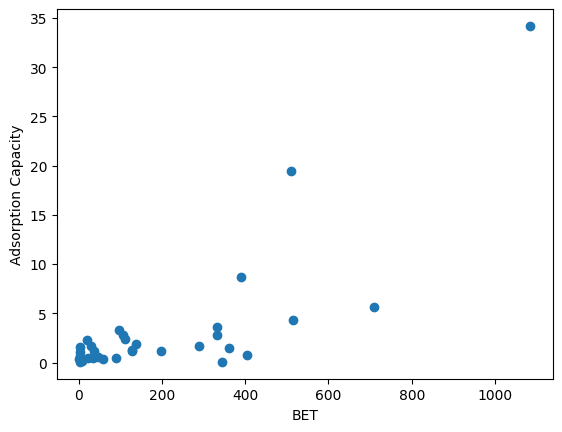

In [ ]:

BET = data['BET(x5)']
plt.scatter(BET, y)
plt.xlabel('BET')
plt.ylabel('Adsorption Capacity')
plt.show()